In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Salary.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


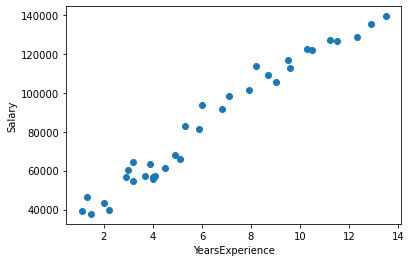

In [4]:
plt.scatter(data['YearsExperience'],data['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [6]:
x = data.iloc[:,:-1].values #iloc function is used to select rows and columns by number/index they appear in the dataframe
y = data.iloc[:,-1].values

# Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
LinReg = LinearRegression()
LinReg.fit(x_train,y_train)
y_pred = LinReg.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

print(y_pred)
print(y_test)

[ 67631.40503486  80836.12861418  45623.53240266 120450.29935213
 141577.85707904 118689.66954156  97562.11181465 112527.46520454
 111647.15029926 136295.96764732  74673.92427716]
[ 61111  93940  43525 121872 135675 122391 101302 112635 116969 128765
  83088]


In [13]:
loss = y_test-y_pred
loss

array([-6520.40503486, 13103.87138582, -2098.53240266,  1421.70064787,
       -5902.85707904,  3701.33045844,  3739.88818535,   107.53479546,
        5321.84970074, -7530.96764732,  8414.07572284])

In [15]:
res_df = pd.concat([pd.Series(y_pred),pd.Series(y_test),pd.Series(loss)],axis=1)
res_df.columns = ['Prediction','Original Data','Diff']
res_df

,Prediction,Original Data,Diff
0,67631.405035,61111,-6520.405035
1,80836.128614,93940,13103.871386
2,45623.532403,43525,-2098.532403
3,120450.299352,121872,1421.700648
4,141577.857079,135675,-5902.857079
5,118689.669542,122391,3701.330458
6,97562.111815,101302,3739.888185
7,112527.465205,112635,107.534795
8,111647.150299,116969,5321.849701
9,136295.967647,128765,-7530.967647


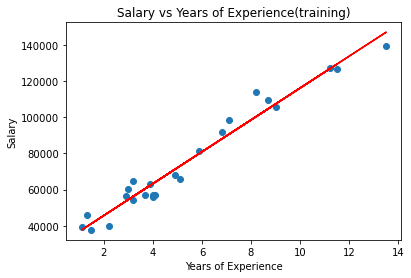

In [19]:
plt.scatter(x_train,y_train)
plt.plot(x_train,LinReg.predict(x_train),color='red')
plt.title('Salary vs Years of Experience(training)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

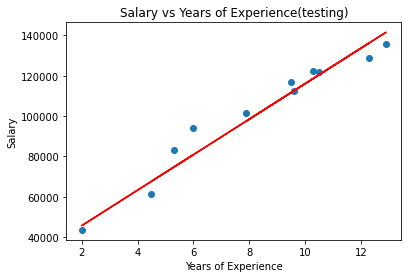

In [20]:
plt.scatter(x_test,y_test)
plt.plot(x_test,LinReg.predict(x_test),color='red')
plt.title('Salary vs Years of Experience(testing)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [25]:
print("Intercept:",LinReg.intercept_)
print("Coefficient:",LinReg.coef_)

Intercept: 28017.234296906216
Coefficient: [8803.14905288]


In [33]:
from sklearn import metrics

rmse = np.sqrt(metrics.mean_squared_error(y_pred,y_test))
print('rmse:',rmse)
# means on average the predicted value and original value has value difference of 6317
R2 = metrics.r2_score(y_pred,y_test)
print('r2 score:',R2)

rmse: 6317.568019802611
r2 score: 0.9518621234278004


# Decision Tree Regressor

In [45]:
from sklearn.tree import DecisionTreeRegressor
DTReg = DecisionTreeRegressor()
DTReg.fit(x_train,y_train)
y_pred_dt = DTReg.predict(x_test)
y_pred_dt

array([ 57081.,  81363.,  39891., 127345., 139465., 127345., 113812.,
       105582., 105582., 126756.,  66029.])

In [43]:
y_test

array([ 61111,  93940,  43525, 121872, 135675, 122391, 101302, 112635,
       116969, 128765,  83088], dtype=int64)

In [46]:
loss_dt = y_pred_dt-y_test
res_df_dt = pd.concat([pd.Series(y_pred),pd.Series(y_test),pd.Series(loss)],axis=1)
res_df_dt.columns = ['Prediction','Original Data','Diff']
res_df_dt

,Prediction,Original Data,Diff
0,67631.405035,61111,-6520.405035
1,80836.128614,93940,13103.871386
2,45623.532403,43525,-2098.532403
3,120450.299352,121872,1421.700648
4,141577.857079,135675,-5902.857079
5,118689.669542,122391,3701.330458
6,97562.111815,101302,3739.888185
7,112527.465205,112635,107.534795
8,111647.150299,116969,5321.849701
9,136295.967647,128765,-7530.967647


In [47]:
from sklearn import metrics

rmse = np.sqrt(metrics.mean_squared_error(y_pred_dt,y_test))
print('rmse:',rmse)
# means on average the predicted value and original value has value difference of 6317
R2 = metrics.r2_score(y_pred_dt,y_test)
print('r2 score:',R2)

rmse: 8982.012175858634
r2 score: 0.9191014671549109


In [51]:
from sklearn import tree
text_representation = tree.export_text(DTReg)
print(text_representation)

|--- feature_0 <= 6.35
|   |--- feature_0 <= 2.55
|   |   |--- feature_0 <= 1.40
|   |   |   |--- feature_0 <= 1.20
|   |   |   |   |--- value: [39343.00]
|   |   |   |--- feature_0 >  1.20
|   |   |   |   |--- value: [46205.00]
|   |   |--- feature_0 >  1.40
|   |   |   |--- feature_0 <= 1.85
|   |   |   |   |--- value: [37731.00]
|   |   |   |--- feature_0 >  1.85
|   |   |   |   |--- value: [39891.00]
|   |--- feature_0 >  2.55
|   |   |--- feature_0 <= 5.50
|   |   |   |--- feature_0 <= 4.50
|   |   |   |   |--- feature_0 <= 3.95
|   |   |   |   |   |--- feature_0 <= 3.80
|   |   |   |   |   |   |--- feature_0 <= 2.95
|   |   |   |   |   |   |   |--- value: [56642.00]
|   |   |   |   |   |   |--- feature_0 >  2.95
|   |   |   |   |   |   |   |--- feature_0 <= 3.45
|   |   |   |   |   |   |   |   |--- feature_0 <= 3.10
|   |   |   |   |   |   |   |   |   |--- value: [60150.00]
|   |   |   |   |   |   |   |   |--- feature_0 >  3.10
|   |   |   |   |   |   |   |   |   |--- value: [594

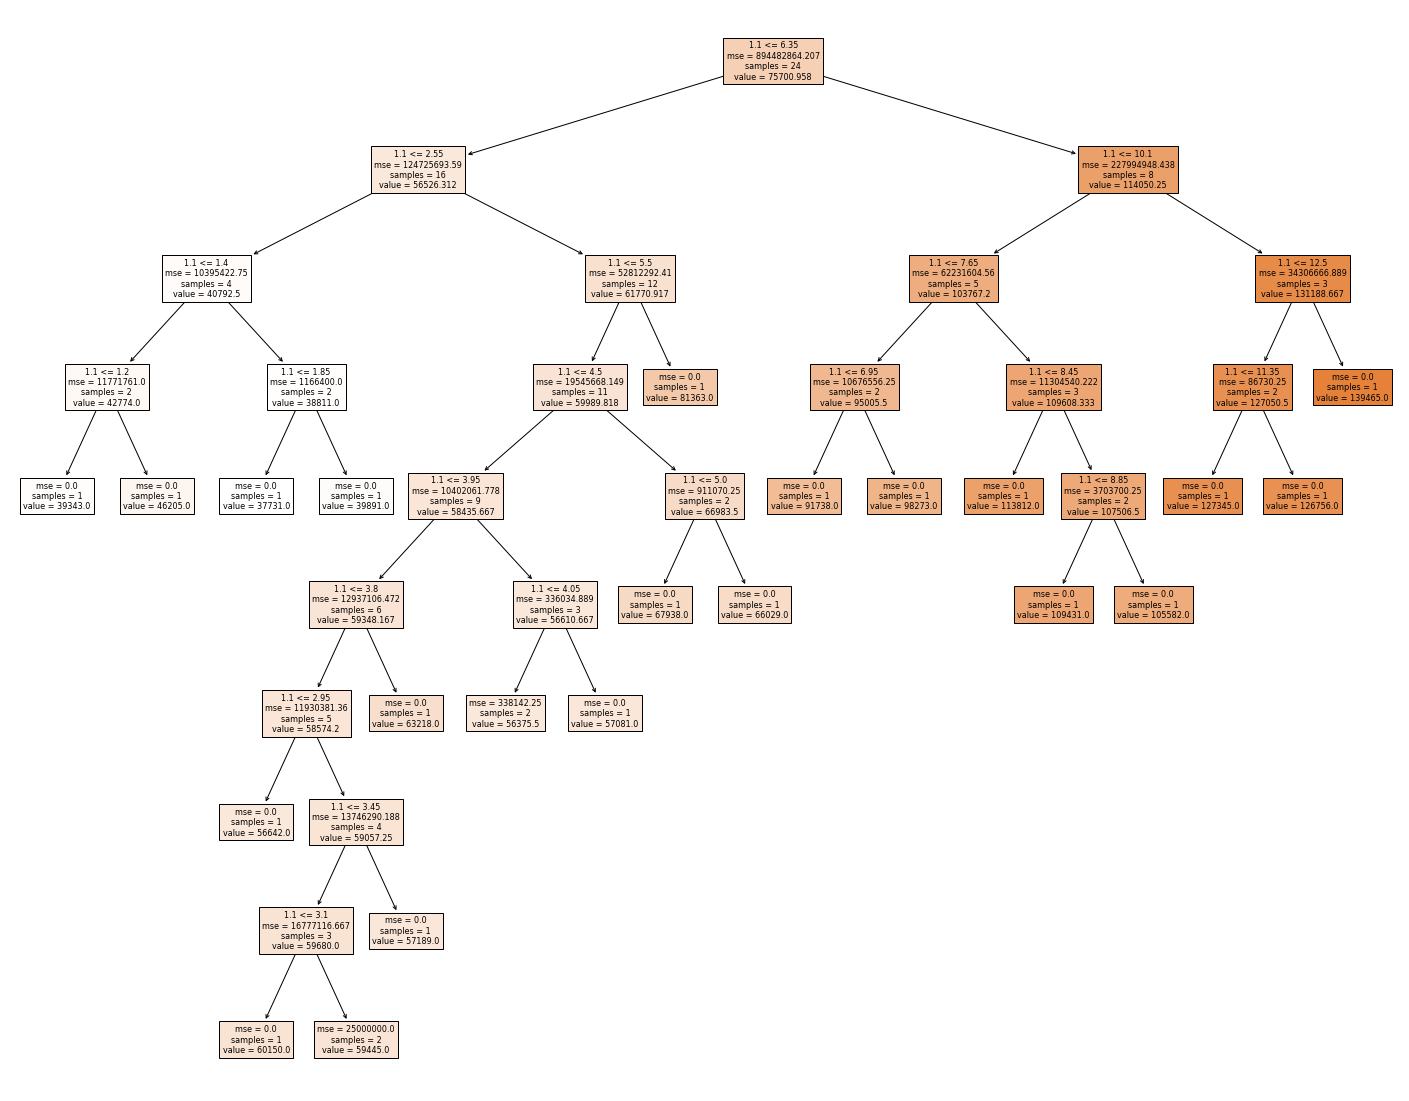

In [53]:
fig = plt.figure(figsize=(25,20))
fig_representation = tree.plot_tree(DTReg,feature_names=data['YearsExperience'],filled=True)